## Running PCA, Spectral Clustering and K-Means with MNIST Handwritten Digits 

### PCA

In [138]:
import numpy as np
import matplotlib.pyplot as plt
data=np.float64(np.load('MNIST.npy'))
labels=np.float32(np.load('MNIST_labels.npy'))
data = data/255

In [139]:
n = len(data)
val_int = int(n * 0.2)
train_int = int(n * 0.6)

train = data[: train_int]
validation = data[train_int : train_int + val_int]
test = data[train_int + val_int :]

train_labels = labels[: train_int]
val_labels= labels[train_int : train_int + val_int]
test_labels = labels[train_int + val_int :]

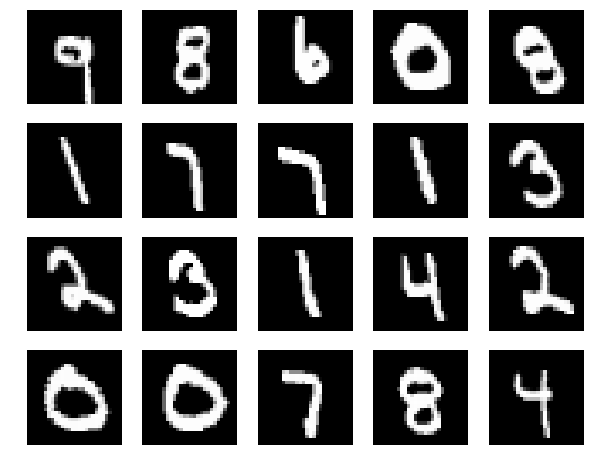

In [140]:
nrows = 4
ncols = 5
plt.figure(figsize=(ncols*2, nrows*2))
for i in xrange(nrows*ncols):
   plt.subplot(nrows, ncols, i+1)
   plt.imshow(test[i].reshape((28,28)), cmap='gray')
   plt.axis('off')
plt.axis('off')
plt.show()

In [141]:
from sklearn.preprocessing import StandardScaler
mean = np.mean(train, axis = 0)

mean_vec = np.mean(train, axis = 0)
train = train - mean
cov_mat = (train - mean_vec).T.dot((train - mean_vec)) / (train.shape[0] - 1)

In [142]:
cov_mat = np.cov(train.T)
eig_vals, eig_vecs = np.linalg.eig(np.dot(train.T,train))
order = np.argsort(eig_vals)
eig_vals = eig_vals[order[ : : -1]]
V = eig_vecs[ : ,order[ : : -1]]

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


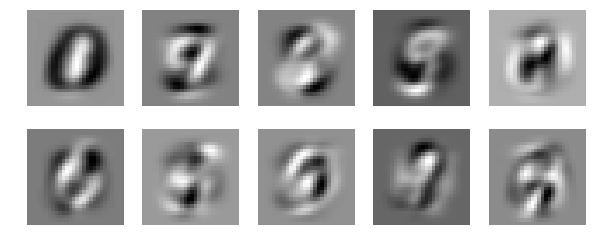

In [143]:
nrows = 2
ncols = 5
t_ten = V[ : , 0 : 10].astype(float)
plt.figure(figsize = (ncols*2, nrows*2))
for i in xrange(nrows*ncols):
   plt.subplot(nrows, ncols, i+1)
   plt.imshow(t_ten[ : ,i].reshape((28,28)), cmap='gray')
   plt.axis('off')
plt.axis('off')
plt.show()

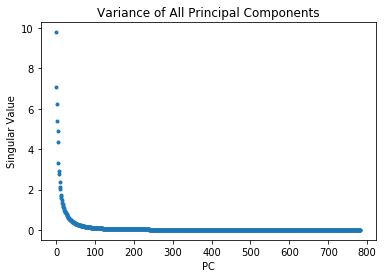

In [144]:
total = sum(eig_vals)
var_exp = [(i / total)*100 for i in sorted(eig_vals, reverse = True)]
plt.plot(var_exp,'.')
plt.title('Variance of All Principal Components')
plt.xlabel('PC')
plt.ylabel('Singular Value')
plt.show()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


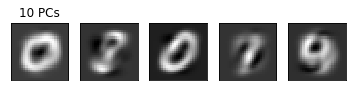

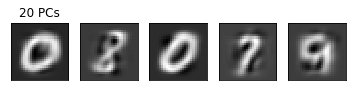

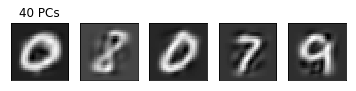

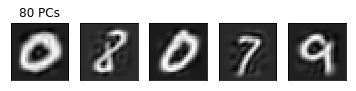

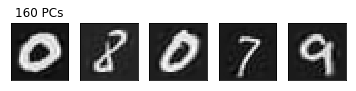

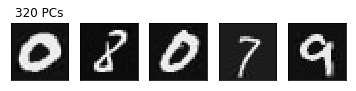

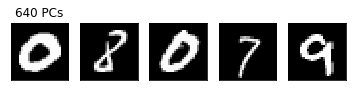

In [145]:
import random as rand 

mVals = [10,20,40,80,160,320,640]
dataPoints = rand.sample(range(0,len(test)),5)

rotatedDataPoints = np.dot(train[dataPoints,:],V)

for m in mVals:
    repreMatrix = np.dot(rotatedDataPoints[:, 0:m],V[:,0:m].T) + mean

    f,subplts = plt.subplots(1, 5)
    vectors = repreMatrix.astype(float)
    subplts[0].set_title(str(m) + ' PCs')
    for i,d in enumerate(dataPoints):
        subplts[i].imshow(vectors[i,:].reshape(28,28)).set_cmap('gray')
        subplts[i].axes.get_xaxis().set_visible(False)
        subplts[i].get_yaxis().set_visible(False)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


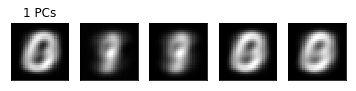

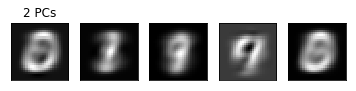

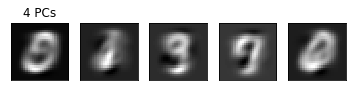

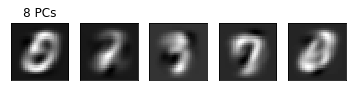

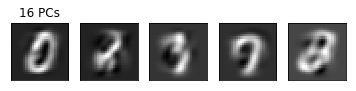

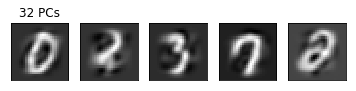

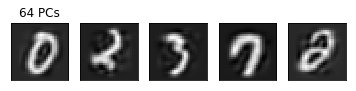

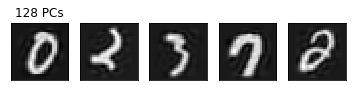

In [146]:
import random as rand 

mVals = [1,2,4,8,16,32,64, 128]
dataPoints = rand.sample(range(0,len(test)),5)

rotatedDataPoints = np.dot(train[dataPoints,:],V)

for m in mVals:
    repreMatrix = np.dot(rotatedDataPoints[:, 0:m],V[:,0:m].T) + mean

    f,subplts = plt.subplots(1, 5)
    vectors = repreMatrix.astype(float)
    subplts[0].set_title(str(m) + ' PCs')
    for i,d in enumerate(dataPoints):
        subplts[i].imshow(vectors[i,:].reshape(28,28)).set_cmap('gray')
        subplts[i].axes.get_xaxis().set_visible(False)
        subplts[i].get_yaxis().set_visible(False)

We notice that the images become more clear and discernable when using higher values of m projecting towards more Principal Components. The more PCs we employ, the clearer the images become. 

### K-Means

In [64]:
from sklearn.cluster import KMeans

n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=0, max_iter=50).fit(data)

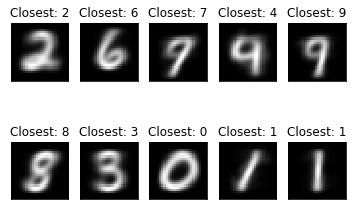

In [66]:
from scipy.stats import mode
loc_dict = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}
res = {}
for val in loc_dict.keys():
    a =labels[loc_dict[val]]
    res[val] = mode(a)
f,subplts = plt.subplots(2,5)
for i in range(10):
    r = i/5
    c = i%5
    subplts[r,c].imshow(kmeans.cluster_centers_[i].reshape(28,28)).set_cmap('gray')
    subplts[r,c].axes.get_xaxis().set_visible(False)
    subplts[r,c].get_yaxis().set_visible(False)
    subplts[r,c].set_title('Closest: ' + str(int(res[i].mode[0])))

## Spectral Clustering

In [102]:
spec_data = data[:1000]
from scipy.spatial.distance import pdist, squareform
import scipy as scipy
pairwise_dists = squareform(pdist(spec_data, 'euclidean'))
h = 3
K = scipy.exp(- pairwise_dists ** 2 / h)

In [103]:
from scipy.sparse import csgraph
lap ,d = csgraph.laplacian(K, normed=True, return_diag=True)

In [104]:
eig_vals, eig_vecs = np.linalg.eig(lap)
order = np.argsort(eig_vals)
eig_vals = eig_vals[order[::-1]]
V = eig_vecs[:,order[::-1]]

In [130]:
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=0, max_iter=50).fit(eig_vecs[:, 0:784]) 

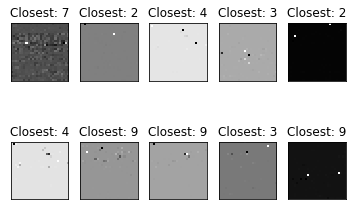

In [136]:
loc_dict = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}
res = {}
for val in loc_dict.keys():
    a = labels[loc_dict[val]]
    res[val] = mode(a)
f,subplts = plt.subplots(2,5)
for i in range(n_clusters):
    r = i/5
    c = i%5
    subplts[r,c].imshow(kmeans.cluster_centers_[i].reshape(28,28)).set_cmap('gray')
    subplts[r,c].get_xaxis().set_visible(False)
    subplts[r,c].get_yaxis().set_visible(False)
    subplts[r,c].set_title('Closest: ' + str(int(res[i].mode[0])))

Compared to the other analyses, this one barely resembles the handwritten digits and seems far more inferior to K-means and PCA methods. That being said, I may be doing something wrong in my calculations for the eigenvector quantities that run through the k-means process in Spectral Clustering. The numbers are barely visible compared to the other quantities. 